In [1]:
# Install missing libraries (only runs if needed)
!pip install scikit-learn pandas numpy matplotlib seaborn --quiet

# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building & evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reproducibility
import random
random.seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Dataset load
df = pd.read_csv('emoji_dataset_expanded_with_clean.csv')

# First few rows dekhna
print("\n📊 First 5 rows:")
print(df.head())


📊 First 5 rows:
                            sentence emoji                        text_clean
0          I’m praying for you. haha     🙏          i m praying for you haha
1                  Good vibes only..     😊                   good vibes only
2  This lecture is making me sleepy.     😴  this lecture is making me sleepy
3   I’m really angry right now. haha     😡   i m really angry right now haha
4       That joke was hilarious! lol     😂       that joke was hilarious lol


In [3]:
# Basic info
print("\nℹ️ Dataset info:")
print(df.info())


ℹ️ Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    1200 non-null   object
 1   emoji       1200 non-null   object
 2   text_clean  1200 non-null   object
dtypes: object(3)
memory usage: 28.3+ KB
None


In [19]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'http\S+|www\S+', '', text)  # remove links
    return text

# Apply cleaning function to the correct column if needed (though it seems 'text_clean' is already cleaned)
# If 'text_clean' is already the cleaned version, you can skip applying the function
# df['clean_text'] = df['text_clean'].apply(clean_text) # Uncomment and use if you need to re-clean or verify

# Features and labels
X = df['text_clean'] # Use the correct column name 'text_clean'
y = df['emoji']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Logistic Regression (baseline model)
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train_vec, y_train)

# Alternative: MLP (neural net)
# clf_mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=500)
# clf_mlp.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          ❤️       1.00      1.00      1.00        24
           🎂       1.00      1.00      1.00        24
           👍       1.00      1.00      1.00        24
           🔥       1.00      1.00      1.00        24
           😂       1.00      1.00      1.00        24
           😊       1.00      1.00      1.00        24
           😋       1.00      1.00      1.00        24
           😡       1.00      1.00      1.00        24
           😢       1.00      1.00      1.00        24
           😱       1.00      1.00      1.00        24
           😴       1.00      1.00      1.00        24
           🙏       1.00      1.00      1.00        24
           🤔       1.00      1.00      1.00        24
           🥳       1.00      1.00      1.00        24
           🥺       1.00      1.00      1.00        24

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local

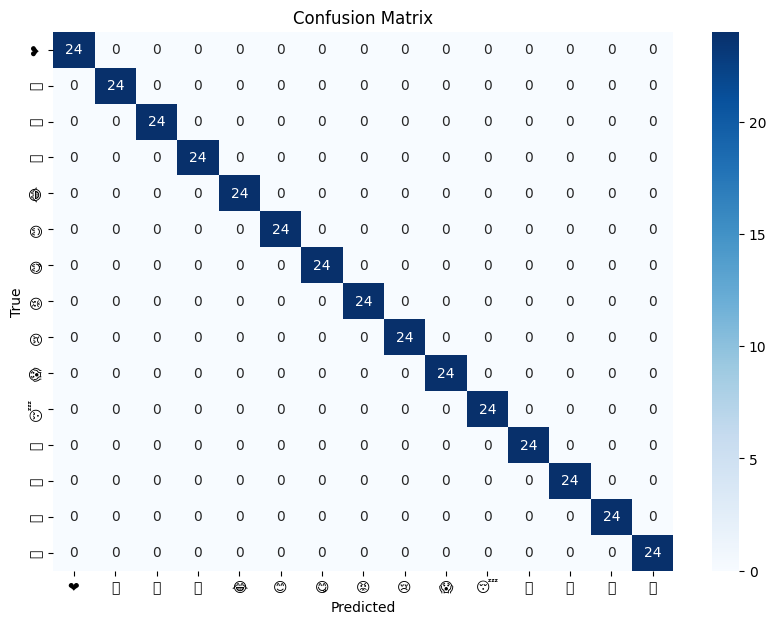

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = clf_lr.predict(X_test_vec)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf_lr.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=clf_lr.classes_, yticklabels=clf_lr.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [9]:
sample_texts = [
    "I love programming!",
    "I hate you",
    "That was so funny!",
    "The food is tasty",
    "Good night everyone"
]

# Preprocess and vectorize
sample_clean = [clean_text(t) for t in sample_texts]
sample_vec = vectorizer.transform(sample_clean)

# Predictions
preds = clf_lr.predict(sample_vec)
for text, pred in zip(sample_texts, preds):
    print(f"{text} → {pred}")


I love programming! → ❤️
I hate you → 🙏
That was so funny! → 😂
The food is tasty → ❤️
Good night everyone → 🥳
